In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler


In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
PATH = os.environ.get("PATH_RAW_DATA")
TICKER = os.environ.get("TICKER")
PATH_RAW_DATA = f"{PATH}-{TICKER}.json"
PATH_RAW_DATA_CSV = f"{PATH}-{TICKER}.csv"

if not os.path.exists(PATH_RAW_DATA_CSV):
  f = open(PATH_RAW_DATA)
  data = json.load(f)
  data = data['Time Series (Daily)']
  df = pd.DataFrame(columns=['Date','Low','High','Close','Open'])
  for k,v in data.items():
    date = dt.datetime.strptime(k, '%Y-%m-%d')
    data_row = [date.date(),float(v['3. low']),float(v['2. high']),
                float(v['4. close']),float(v['1. open'])]
    df.loc[-1,:] = data_row
    df.index = df.index + 1
  print('Data saved to : %s'%PATH_RAW_DATA_CSV)        
  df.to_csv(PATH_RAW_DATA_CSV)

# If the data is already there, just load it from the CSV
else:
    print('File already exists. Loading data from CSV')
    df = pd.read_csv(PATH_RAW_DATA_CSV)


Data saved to : src/data/data-AAL.csv


In [4]:
# Sort DataFrame by date
df = df.sort_values('Date')

# Double check the result
df.head()

,Date,Low,High,Close,Open
0,2005-09-27,19.1,21.4,19.3,21.05
1,2005-09-28,19.2,20.53,20.5,19.3
2,2005-09-29,20.1,20.58,20.21,20.4
3,2005-09-30,20.18,21.05,21.01,20.26
4,2005-10-03,20.9,21.75,21.5,20.9


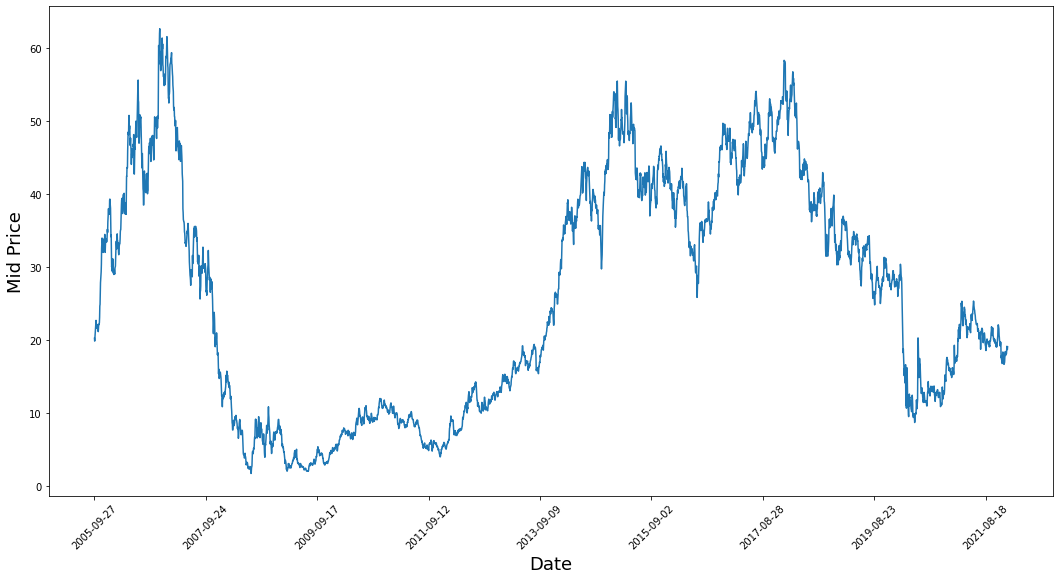

In [9]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()